In [1]:
# Import modules
import numpy as np 
import pandas as pd 
import tensorflow as tf
import matplotlib.pyplot as plt
import math

from sklearn.model_selection import train_test_split
import sklearn.metrics as metrics

#keras
from tensorflow.keras.utils import to_categorical
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import BatchNormalization, Dense, Dropout, Flatten
from tensorflow.keras.layers import Conv2D, MaxPooling2D, AveragePooling2D
from tensorflow.keras.callbacks import LearningRateScheduler, EarlyStopping
from tensorflow.keras.metrics import top_k_categorical_accuracy

In [3]:
def reduce_mem_usage(df):
    """ iterate through all the columns of a dataframe and modify the data type
        to reduce memory usage.        
    """
    start_mem = df.memory_usage().sum() / 1024**2
    print('Memory usage of dataframe is {:.2f} MB'.format(start_mem))
    
    for col in df.columns:
        col_type = df[col].dtype
        
        if col_type != object:
            c_min = df[col].min()
            c_max = df[col].max()
            if str(col_type)[:3] == 'int':
                if c_min > np.iinfo(np.int8).min and c_max < np.iinfo(np.int8).max:
                    df[col] = df[col].astype(np.int8)
                elif c_min > np.iinfo(np.int16).min and c_max < np.iinfo(np.int16).max:
                    df[col] = df[col].astype(np.int16)
                elif c_min > np.iinfo(np.int32).min and c_max < np.iinfo(np.int32).max:
                    df[col] = df[col].astype(np.int32)
                elif c_min > np.iinfo(np.int64).min and c_max < np.iinfo(np.int64).max:
                    df[col] = df[col].astype(np.int64)  
            else:
                if c_min > np.finfo(np.float16).min and c_max < np.finfo(np.float16).max:
                    df[col] = df[col].astype(np.float16)
                elif c_min > np.finfo(np.float32).min and c_max < np.finfo(np.float32).max:
                    df[col] = df[col].astype(np.float32)
                else:
                    df[col] = df[col].astype(np.float64)
        else:
            df[col] = df[col].astype('category')

    end_mem = df.memory_usage().sum() / 1024**2
    print('Memory usage after optimization is: {:.2f} MB'.format(end_mem))
    print('Decreased by {:.1f}%'.format(100 * (start_mem - end_mem) / start_mem))
    
    return df


def import_data(file):
    """create a dataframe and optimize its memory usage"""
    df = pd.read_csv(file, parse_dates=True, keep_date_col=True, index_col=0)
    df = reduce_mem_usage(df)
    return df

In [4]:
df1 = import_data(r'../input/traininglicensechars1/training_chars_1.csv')
df2 = import_data(r'../input/traininglicensechars2/training_chars_2.csv')
df3 = import_data(r'../input/traininglicensechars3/training_chars_3.csv')
df4 = import_data(r'../input/traininglicensechars4/training_chars_4.csv')

df = pd.concat([df1,df2,df3,df4], axis=0)
df.head()

Memory usage of dataframe is 515.75 MB
Memory usage after optimization is: 129.89 MB
Decreased by 74.8%
Memory usage of dataframe is 515.75 MB
Memory usage after optimization is: 129.89 MB
Decreased by 74.8%
Memory usage of dataframe is 515.75 MB
Memory usage after optimization is: 129.89 MB
Decreased by 74.8%
Memory usage of dataframe is 357.01 MB
Memory usage after optimization is: 89.91 MB
Decreased by 74.8%


,0,1,2,3,4,5,6,7,8,9,...,327,328,329,330,331,332,333,334,335,336
0,0,0.0,0.0,0.0,255.0,255.0,255.0,255.0,0.0,0.0,...,255.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0,0.0,0.0,0.0,255.0,255.0,255.0,255.0,0.0,0.0,...,255.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0,0.0,0.0,0.0,255.0,255.0,255.0,255.0,0.0,0.0,...,255.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0,0.0,0.0,0.0,255.0,255.0,255.0,255.0,0.0,0.0,...,255.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0,0.0,0.0,0.0,255.0,255.0,255.0,255.0,0.0,0.0,...,255.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [ ]:
for i in range(0,21):
    print(df_l2[df_l2["0"]==i].shape)

In [7]:
mapp = pd.read_csv(
    r'../input/license-char/label_char.csv',
    delimiter=',',
    index_col=0,
#     header=None,
#     squeeze=True
)
mapp

,Character,ASCII
0,A,65
1,B,66
2,C,67
3,D,68
4,E,69
5,F,70
6,G,71
7,H,72
8,K,75
9,L,76


In [11]:
# Constants
HEIGHT = 28
WIDTH = 12

In [8]:
# Split x and y
df_x = df.iloc[:,1:] # Get the images
df_y = df.iloc[:,0] # Get the label
# del train # free up some memory

# test_x = test.iloc[:,1:]
# test_y = test.iloc[:,0]
# del test

train_x, test_x, train_y, test_y = train_test_split(df_x,df_y,test_size=0.2,random_state=7)
print(train_x.shape, test_x.shape, train_y.shape, test_y.shape)

(590755, 336) (147689, 336) (590755,) (147689,)


In [9]:
# Reshape and rotate EMNIST images
def rotate(image):
    image = image.reshape(HEIGHT, WIDTH)
#     image = np.fliplr(image)
#     image = np.rot90(image)
    return image 

In [12]:
# Flip and rotate image
train_x = np.asarray(train_x)
train_x = np.apply_along_axis(rotate, 1, train_x)
print ("train_x:",train_x.shape)

test_x = np.asarray(test_x)
test_x = np.apply_along_axis(rotate, 1, test_x)
print ("test_x:",test_x.shape)

train_x: (590755, 28, 12)
test_x: (147689, 28, 12)


In [13]:
# Normalize
train_x = train_x / 255.0
test_x = test_x / 255.0
print(type(train_x[0,0,0]))
print(type(test_x[0,0,0]))

<class 'numpy.float16'>
<class 'numpy.float16'>


In [ ]:
# DATA AUGMENTATION (0-9 LICENSE PLATE)

df_list = [df_l2]
for n in range(0,21):
    num = n

    df_x_0 = df_l2[df_l2["0"]==num].iloc[:,1:]
    df_y_0 = df_l2[df_l2["0"]==num].iloc[:,0]
#     #     df_x_0 = new_main.iloc[:,1:]
#     #     df_y_0 = new_main.iloc[:,0]
#     # df_x_0 = np.asarray(df_x_0)
#     # df_x_0 = np.apply_along_axis(rotate, 1, df_x_0)
#     # df_x_0 = df_x_0 / 255.0
#     # df_x_0 = df_x_0.reshape((df_x_0.shape[0], 28, 12, 1))
#     # test_x_0 = test_x_0 / 255.0

    train_x_0, test_x_0, train_y_0, test_y_0 = train_test_split(df_x_0, df_y_0, test_size=0.2, random_state=7)

    train_x_0 = np.asarray(train_x_0)
    train_x_0 = np.apply_along_axis(rotate, 1, train_x_0)

    test_x_0 = np.asarray(test_x_0)
    test_x_0 = np.apply_along_axis(rotate, 1, test_x_0)

    train_x_0 = train_x_0 / 255.0
    test_x_0 = test_x_0 / 255.0


    # Save augmented images to file
    # reshape to be [samples][width][height][channels]
    X_0_train = train_x_0.reshape((train_x_0.shape[0], 28, 12, 1))
    X_0_test = test_x_0.reshape((test_x_0.shape[0], 28, 12, 1))

    datagen1 = ImageDataGenerator(  rotation_range = 5,
                                    zoom_range = 0.1,
                                    width_shift_range=0.07,
                                    height_shift_range=0.04,
#                                     featurewise_center=True, 
#                                     featurewise_std_normalization=True,
               )
    # fit parameters from data
    datagen1.fit(X_0_train)

    batch_size = X_0_train.shape[0]
    print(batch_size)
    augmented_data = []
    num_augmented = 0
    # configure batch size and retrieve one batch of images
    for X_batch, y_batch in datagen1.flow(X_0_train, train_y_0, batch_size=4): #save_to_dir='/kaggle/working', 
                                          #save_prefix='aug', save_format='png'):
        # Append new data into the list    
        augmented_data.append(X_batch)
        num_augmented += 4
        # Stop datagen.flow() as long as num_augmented is reached so that no extra augmented images are generated
        if num_augmented == batch_size:
            break
#         create a grid of 10x10 images
#         plt.figure(figsize=(15,15))
#         for i in range(0, 100):
#             plt.subplot(10,10,i+1)
#             plt.subplots_adjust(hspace=0.5, top=1)
#             plt.imshow(X_batch[i].reshape(28, 12))
#     	# show the plot
#         plt.show()
#         break

    augmented_data = np.concatenate(augmented_data)
    augmented_data *= 255
    augmented_data = augmented_data.reshape(augmented_data.shape[0],336)
    augmented_data = np.insert(augmented_data,0,num,axis=1)
    new_imgs = []
    for i in augmented_data:
        new_imgs.append(i.flatten())

    new_df = pd.DataFrame(new_imgs, columns=[str(i) for i in range(337)])
    new_df["0"] = [int(i) for i in new_df["0"].values]
    df_list.append(new_df)
#     # new_df3
# new_df.to_csv("new_main_{}.csv".format(num))

In [ ]:
# new_main = pd.concat(df_list, axis=0)
# new_main.reset_index(inplace=True, drop=True)
# df_l3 = new_main
# df_l3
df_l3.to_csv("training_chars.csv")
# len(df_list)

In [ ]:
# new_df.to_csv('new_df_162400.csv')

In [14]:
# Number of classes
num_classes = train_y.nunique() # .nunique() returns the number of unique objects
print(num_classes) 

21


In [15]:
# One hot encoding
train_y = to_categorical(train_y, num_classes)
test_y = to_categorical(test_y, num_classes)
print("train_y: ", train_y.shape)
print("test_y: ", test_y.shape)

train_y:  (590755, 21)
test_y:  (147689, 21)


In [16]:
# partition to train and val
train_x, val_x, train_y, val_y = train_test_split(train_x, 
                                                  train_y, 
                                                  test_size=0.10, 
                                                  random_state=7)

print(train_x.shape, val_x.shape, train_y.shape, val_y.shape)

(531679, 28, 12) (59076, 28, 12) (531679, 21) (59076, 21)


In [17]:
# Reshape
train_x = train_x.reshape(-1, HEIGHT, WIDTH, 1)
test_x = test_x.reshape(-1, HEIGHT, WIDTH, 1)
val_x = val_x.reshape(-1, HEIGHT, WIDTH, 1)

In [18]:
# Create more images via data augmentation
datagen = ImageDataGenerator(
    rotation_range = 10,
    zoom_range = 0.10,
    width_shift_range=0.1,
    height_shift_range=0.1
)

train_gen = datagen.flow(train_x, train_y, batch_size=64)
val_gen = datagen.flow(val_x, val_y, batch_size=64)

In [19]:
# Building model
# ((Si - Fi + 2P)/S) + 1

model = Sequential()

model.add(Conv2D(32, kernel_size=3, activation='relu', input_shape=(HEIGHT, WIDTH, 1)))
model.add(BatchNormalization())
model.add(Conv2D(32, kernel_size=3,activation='relu'))
model.add(BatchNormalization())
model.add(Conv2D(32, kernel_size=5, strides=2, padding='same', activation='relu'))
model.add(BatchNormalization())
model.add(Dropout(0.4))


# model.add(Conv2D(64, kernel_size=3, activation='relu'))
# model.add(BatchNormalization())
# # model.add(Conv2D(64, kernel_size=3, activation='relu'))
# # model.add(BatchNormalization())
# model.add(Conv2D(64, kernel_size=5, strides=2, padding='same', activation='relu'))
# model.add(BatchNormalization())
# model.add(Dropout(0.4))


model.add(Conv2D(128, kernel_size=4, activation='relu'))
model.add(BatchNormalization())


model.add(Flatten())
model.add(Dropout(0.4))
model.add(Dense(units=num_classes, activation='softmax'))

input_shape = (None, HEIGHT, WIDTH, 1)
model.build(input_shape)
model.summary()


Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 26, 10, 32)        320       
_________________________________________________________________
batch_normalization (BatchNo (None, 26, 10, 32)        128       
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 24, 8, 32)         9248      
_________________________________________________________________
batch_normalization_1 (Batch (None, 24, 8, 32)         128       
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 12, 4, 32)         25632     
_________________________________________________________________
batch_normalization_2 (Batch (None, 12, 4, 32)         128       
_________________________________________________________________
dropout (Dropout)            (None, 12, 4, 32)         0

In [20]:
my_callbacks = [
    # Decrease learning rate
    LearningRateScheduler(lambda x: 1e-3 * 0.95 ** x),
    # Training will stop there is no improvement in val_loss after 3 epochs
    EarlyStopping(monitor="val_accuracy", 
                  patience=10, 
                  mode='max', 
                  restore_best_weights=True)
]

# def top_3_accuracy(y_true, y_pred):
#     return top_k_categorical_accuracy(y_true, y_pred, k=3)


# TRAIN NETWORKS
model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])
# history = model.fit(train_x, train_y, 
#                     epochs=100,
#                     verbose=1, validation_data=(val_x, val_y), 
#                     callbacks=my_callbacks)

# With datagen
history = model.fit_generator(train_gen, steps_per_epoch=train_x.shape[0]//64, epochs=100,
                              validation_data=val_gen, validation_steps=val_x.shape[0]//64, callbacks=my_callbacks)

Train for 8307 steps, validate for 923 steps
Epoch 1/100
8307/8307 [==============================] - 188s 23ms/step - loss: 0.1897 - accuracy: 0.9414 - val_loss: 0.0654 - val_accuracy: 0.9792
Epoch 2/100
8307/8307 [==============================] - 175s 21ms/step - loss: 0.0799 - accuracy: 0.9745 - val_loss: 0.0467 - val_accuracy: 0.9854
Epoch 3/100
8307/8307 [==============================] - 172s 21ms/step - loss: 0.0615 - accuracy: 0.9800 - val_loss: 0.0382 - val_accuracy: 0.9877
Epoch 4/100
8307/8307 [==============================] - 173s 21ms/step - loss: 0.0521 - accuracy: 0.9831 - val_loss: 0.0281 - val_accuracy: 0.9907
Epoch 5/100
8307/8307 [==============================] - 172s 21ms/step - loss: 0.0462 - accuracy: 0.9846 - val_loss: 0.0263 - val_accuracy: 0.9914
Epoch 6/100
8307/8307 [==============================] - 172s 21ms/step - loss: 0.0423 - accuracy: 0.9861 - val_loss: 0.0253 - val_accuracy: 0.9915
Epoch 7/100
8307/8307 [==============================] - 171s 21ms/

Epoch 56/100
8307/8307 [==============================] - 169s 20ms/step - loss: 0.0141 - accuracy: 0.9953 - val_loss: 0.0054 - val_accuracy: 0.9982
Epoch 57/100
8307/8307 [==============================] - 167s 20ms/step - loss: 0.0136 - accuracy: 0.9955 - val_loss: 0.0051 - val_accuracy: 0.9982


In [21]:
# plot accuracy and loss
def plotacc(epochs, acc, val_acc):
    # Plot training & validation accuracy values
    plt.plot(epochs, acc, 'b')
    plt.plot(epochs, val_acc, 'r')
    plt.title('Model accuracy')
    plt.ylabel('Accuracy')
    plt.xlabel('Epoch')
    plt.legend(['Train', 'Val'], loc='upper left')
    plt.show()

def plotloss(epochs, acc, val_acc):
    # Plot training & validation accuracy values
    plt.plot(epochs, acc, 'b')
    plt.plot(epochs, val_acc, 'r')
    plt.title('Model loss')
    plt.ylabel('Loss')
    plt.xlabel('Epoch')
    plt.legend(['Train', 'Val'], loc='upper left')
    plt.show()

In [22]:
#%%
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']
loss = history.history['loss']
val_loss = history.history['val_loss']
epochs = range(1,len(acc)+1)

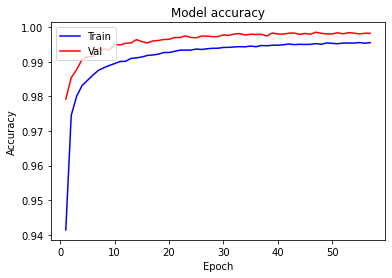

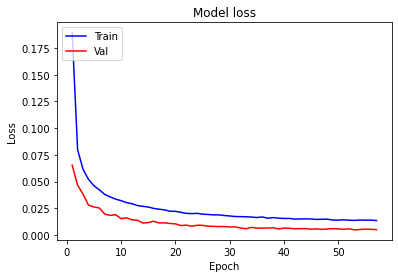

In [23]:
# Accuracy curve
plotacc(epochs, acc, val_acc)

# loss curve
plotloss(epochs, loss, val_loss)

In [24]:
# del train_x
# del train_y

score = model.evaluate(test_x, test_y, verbose=0)
print("Test loss:", score[0])
print("Test accuracy:", score[1])

Test loss: 0.0007433906492001319
Test accuracy: 0.9997901


In [27]:
model.save("emnist_model_char_plates_aug.h5")

In [28]:
model.save_weights("emnist_model_weights_char_plates_aug.h5")

In [ ]:
y_pred = model.predict(test_x)
y_pred = (y_pred > 0.5)

cm = metrics.confusion_matrix(test_y.argmax(axis=1), y_pred.argmax(axis=1))
print(cm)